In [2]:
import math
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
uploaded = files.upload()
import pandas as pd


Saving winequality-white.csv to winequality-white.csv


In [3]:
import io
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [4]:
def euclideanDistance(X, Y):
  distance = 0
  for i in range(len(X)):
    distance = distance + ((Y[i]-X[i])**2)
  return int(math.sqrt(distance))

In [ ]:
X = [1,2,3,4]
Y = [5,6,7,8]
euclideanDistance(X, Y)

8.0

In [5]:
def manhattanDistance(X,Y):
  distance = 0
  for i in range(len(X)):
    distance = distance + abs(X[i]-Y[i])
  return distance

In [6]:
def accuracyGeneralization(actual, predicted):
  #Raise an error if the length of actual and predicted are not the same, since that isnt possible
  if len(actual) != len(predicted):
    return "ACTUAL AND PREDICTED MUST BE OF SAME LENGTH"
  else:
    #We will want to count how many predictions we got accurate.
    correctPrediction = 0
    #We will pair up actual and predicted values respectivley and for each, check if they match.
    #if they do match, we will increase correctPrediction by 1
    for i in range(len(actual)):
      if actual[i] == predicted[i]:
        correctPrediction = correctPrediction + 1
    #The accuracy of our prediction will be the ratio between the amount of predictions we got correct
    #to the actual total correct value for each label (actual)
    accuracy = correctPrediction/len(actual)
    generalization = 1 - accuracy
    return accuracy, generalization

In [ ]:
actualTest = [1,2,3,4,5,6]
predictedTest = [2,2,1,4,4,6]
accuracyGeneralization(actualTest, predictedTest)

(0.5, 0.5)

In [7]:
#A precision function will determine how precise/accurate our model is when classifying valid positives and
#fake positives.
def precision(validPositives, fakePositives):
  if validPositives == 0 and fakePositives == 0:
    return 0
  else:
    return validPositives/(validPositives + fakePositives)



In [8]:
#The recall function is the exact same as the precision function, excepted we look for fake negatives
def recall(validPositives, fakeNegatives):
  if validPositives == 0 and fakeNegatives == 0:
    return 0
  else:
    return validPositives/(validPositives + fakeNegatives)

In [22]:
#The formula for F1 is 2 * ((precision*recall)/(precision + recall))
def f1Score(yTrue, yPred):
  precisionVal = precision(yTrue, yPred)
  recallVal = recall(yTrue, yPred)
  if precision == 0 and recall == 0:
    return 0
  else:
    return 2 * ((precisionVal * recall)/(precisionVal + recallVal))

In [ ]:
validPositives = 5
fakePositives = 2
fakeNegatives = 2
precisionTest = precision(validPositives, fakePositives)
recallTest = recall(validPositives, fakeNegatives)
f1ScoreTest = f1Score(precisionTest, recallTest)

In [10]:
def confusionMatrix(actual, predicted):
  #All we have to do is keep count of the valid positives&negatives and false positives&negatives
  #between the actual and predicted values
  validPositives = 0
  validNegatives = 0
  falsePositives = 0
  falseNegatives = 0
  for i in range(len(actual)):
      if actual[i] == 1:
          if predicted[i] == 1:
              validPositives += 1
          else:
              falseNegatives += 1
      else:
          if predicted[i] == 1:
              falsePositives += 1
          else:
              validNegatives += 1
  confMatrix = np.array([[validNegatives, falsePositives], [falseNegatives, validPositives]])
  return confMatrix


In [11]:
def rocCurve(actual, predicted):
    # Sort predictions in descending order of probability. Sorting will help out with the auc curve later
    sortedPredicted = sorted(range(len(predicted)), key=lambda i: predicted[i], reverse=True)
    sortedPredictedLabels = []
    vpr = [0] #keeps track of the validPositives
    fpr = [0] #keeps track of the flasePositives
    vp = 0 #inital validPositives
    fp = 0 #inital falsePositives

    for i in sortedPredicted:
        sortedPredictedLabels.append(actual[i])

    totalPositives = sum(sortedPredictedLabels)

    # calculate the validPostiveRate and falsePostiveRate for each predicted label
    for i in sortedPredictedLabels:
        if i == 1:
            vp += 1
        else:
            fp += 1
        vpr.append(vp / totalPositives)
        fpr.append(fp / (len(sortedPredictedLabels) - totalPositives))

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, vpr, marker='o', linestyle='-')
    plt.title('ROC CURVE')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('Valid Positive Rate (TPR)')
    plt.grid(True)
    plt.show()


In [12]:
def auc(fpr, vpr):
    #The area under the curve is just the integral of the roc. so we can use the trapezoide rule to compute the integral
    auc = 0
    for i in range(len(fpr) - 1):
        auc += (fpr[i + 1] - fpr[i]) * (vpr[i] + vpr[i + 1]) / 2
    return auc


In [13]:
def generate_precision_recall_curve(actual_labels, predicted_probs):
    # Initialize lists to store precision and recall values
    precisions = []
    recalls = []

    # Initialize variables for true positives (TP), false positives (FP), and total positives (P)
    tp = 0
    fp = 0
    p = sum(actual_labels)

    # Sort predictions in descending order of probability
    sorted_indices = sorted(range(len(predicted_probs)), key=predicted_probs.__getitem__, reverse=True)
    sorted_labels = []
    for i in sorted_indices:
        sorted_labels.append(actual_labels[i])


    # Calculate precision and recall for each threshold
    for label in sorted_labels:
        if label == 1:
            tp += 1
        else:
            fp += 1
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / p
        precisions.append(precision)
        recalls.append(recall)

    # Plot precision-recall curve
    plt.plot(recalls, precisions, marker='o', linestyle='-')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.grid(True)
    plt.show()


In [28]:
class KNN_Classifier:
  def __init__(self):
    self.X_train = None
    self.Y_train = None
    self.n_neighbors = None
    self.weights = None
    self.kwargs = None

  def fit(self, X, Y, n_neighbors, weight, **kwargs):
    self.X_train = X
    self.Y_train = Y
    self.n_neighbors = n_neighbors
    self.weights = weight
    self.kwargs = kwargs

  def predict(self, X):
    #we will store our predictions here
    predictions = []
    prediction = None
    #we will itterate through each sample data in X and make a prediction for that sample
    for sample in X:
      #We will need to find the euclidian distance, which we can by using the function we created earlier
      distances = [euclideanDistance(sample, x_train) for x_train in self.X_train]
      #sort the indices of the distances and the nearest neigbors
      sorted_indices = np.argsort(distances)
      k_nearest_labels = self.Y_train[sorted_indices[:self.n_neighbors]]

      #Now we can start the prediction
      #If the weights are uniform, then we need to take the most seen label in the k_nearest_labels (we do this by calculating the mode)
      if self.weights == 'uniform':
        prediction = np.argmax(np.bincount(k_nearest_labels))
      #If the weights are distance, then we attribute a specific weight proportional to the neighbors distances. From there, we will then count which neighbor has been seen the most to be our prediction
      elif self.weights == 'distance':
        weights = 1 / (np.array(distances)[sorted_indices[:self.n_neighbors]] + 1e-10)
        prediction = np.argmax(np.bincount(k_nearest_labels, weights=weights))

      predictions.append(prediction)

    return np.array(predictions).reshape(-1, 1)

np.random.seed(42)
xTrain = np.random.rand(10, 2)
yTrain = np.random.randint(0, 2, 10)
xTest = np.random.rand(5, 2)

model = KNN_Classifier()
model.fit(xTrain, yTrain, n_neighbors=3, weight='distance')

predictions = model.predict(xTest)

print("Training Data:")
print("X_train:")
print(xTrain)
print("Y_train:")
print(yTrain)

print("\nTest Data:")
print("X_test:")
print(xTest)

print("\nPredictions:")
print(predictions)

# Create an instance of the KNN_Classifier model
model = KNN_Classifier()

Training Data:
X_train:
[[0.37454012 0.95071431]
 [0.73199394 0.59865848]
 [0.15601864 0.15599452]
 [0.05808361 0.86617615]
 [0.60111501 0.70807258]
 [0.02058449 0.96990985]
 [0.83244264 0.21233911]
 [0.18182497 0.18340451]
 [0.30424224 0.52475643]
 [0.43194502 0.29122914]]
Y_train:
[0 0 1 1 1 1 1 0 1 1]

Test Data:
X_test:
[[0.78517596 0.19967378]
 [0.51423444 0.59241457]
 [0.04645041 0.60754485]
 [0.17052412 0.06505159]
 [0.94888554 0.96563203]]

Predictions:
[[0]
 [0]
 [0]
 [0]
 [0]]


**PART B**

In [17]:
print(uploaded)

{'winequality-white.csv': b'"fixed acidity";"volatile acidity";"citric acid";"residual sugar";"chlorides";"free sulfur dioxide";"total sulfur dioxide";"density";"pH";"sulphates";"alcohol";"quality"\n7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\n6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\n8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\n7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\n7.2;0.23;0.32;8.5;0.058;47;186;0.9956;3.19;0.4;9.9;6\n8.1;0.28;0.4;6.9;0.05;30;97;0.9951;3.26;0.44;10.1;6\n6.2;0.32;0.16;7;0.045;30;136;0.9949;3.18;0.47;9.6;6\n7;0.27;0.36;20.7;0.045;45;170;1.001;3;0.45;8.8;6\n6.3;0.3;0.34;1.6;0.049;14;132;0.994;3.3;0.49;9.5;6\n8.1;0.22;0.43;1.5;0.044;28;129;0.9938;3.22;0.45;11;6\n8.1;0.27;0.41;1.45;0.033;11;63;0.9908;2.99;0.56;12;5\n8.6;0.23;0.4;4.2;0.035;17;109;0.9947;3.14;0.53;9.7;5\n7.9;0.18;0.37;1.2;0.04;16;75;0.992;3.18;0.63;10.8;5\n6.6;0.16;0.4;1.5;0.044;48;143;0.9912;3.54;0.52;12.4;7\n8.3;0.42;0.62;19.25;0.04;41;172;1.0002;2.98;0.67;9.7;5\n6.6;

In [18]:
# Reads the CSV file
df = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']), sep=";")
#seperate the quality column based on when values are greater than 5 and when they are not
df['quality'] = df['quality'].apply(lambda x: 1 if x > 5 else 0)

# Shuffles the row in the data
dfShuffled = df.sample(frac=1)

df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     0.665169  
std       0.151001     0.114126     1.230621     0.471979  
min       2.720000     0.220000     8.000000     0.000000  
25%       3.090000     0.410000     9.500000     0.000000  
50%       3.180000     0.470000    10.400000     1.000000  
75%       3.280000     0.550000    11.400000     1.000000  
max       3.820000     1.080000    14.200000     1.000000

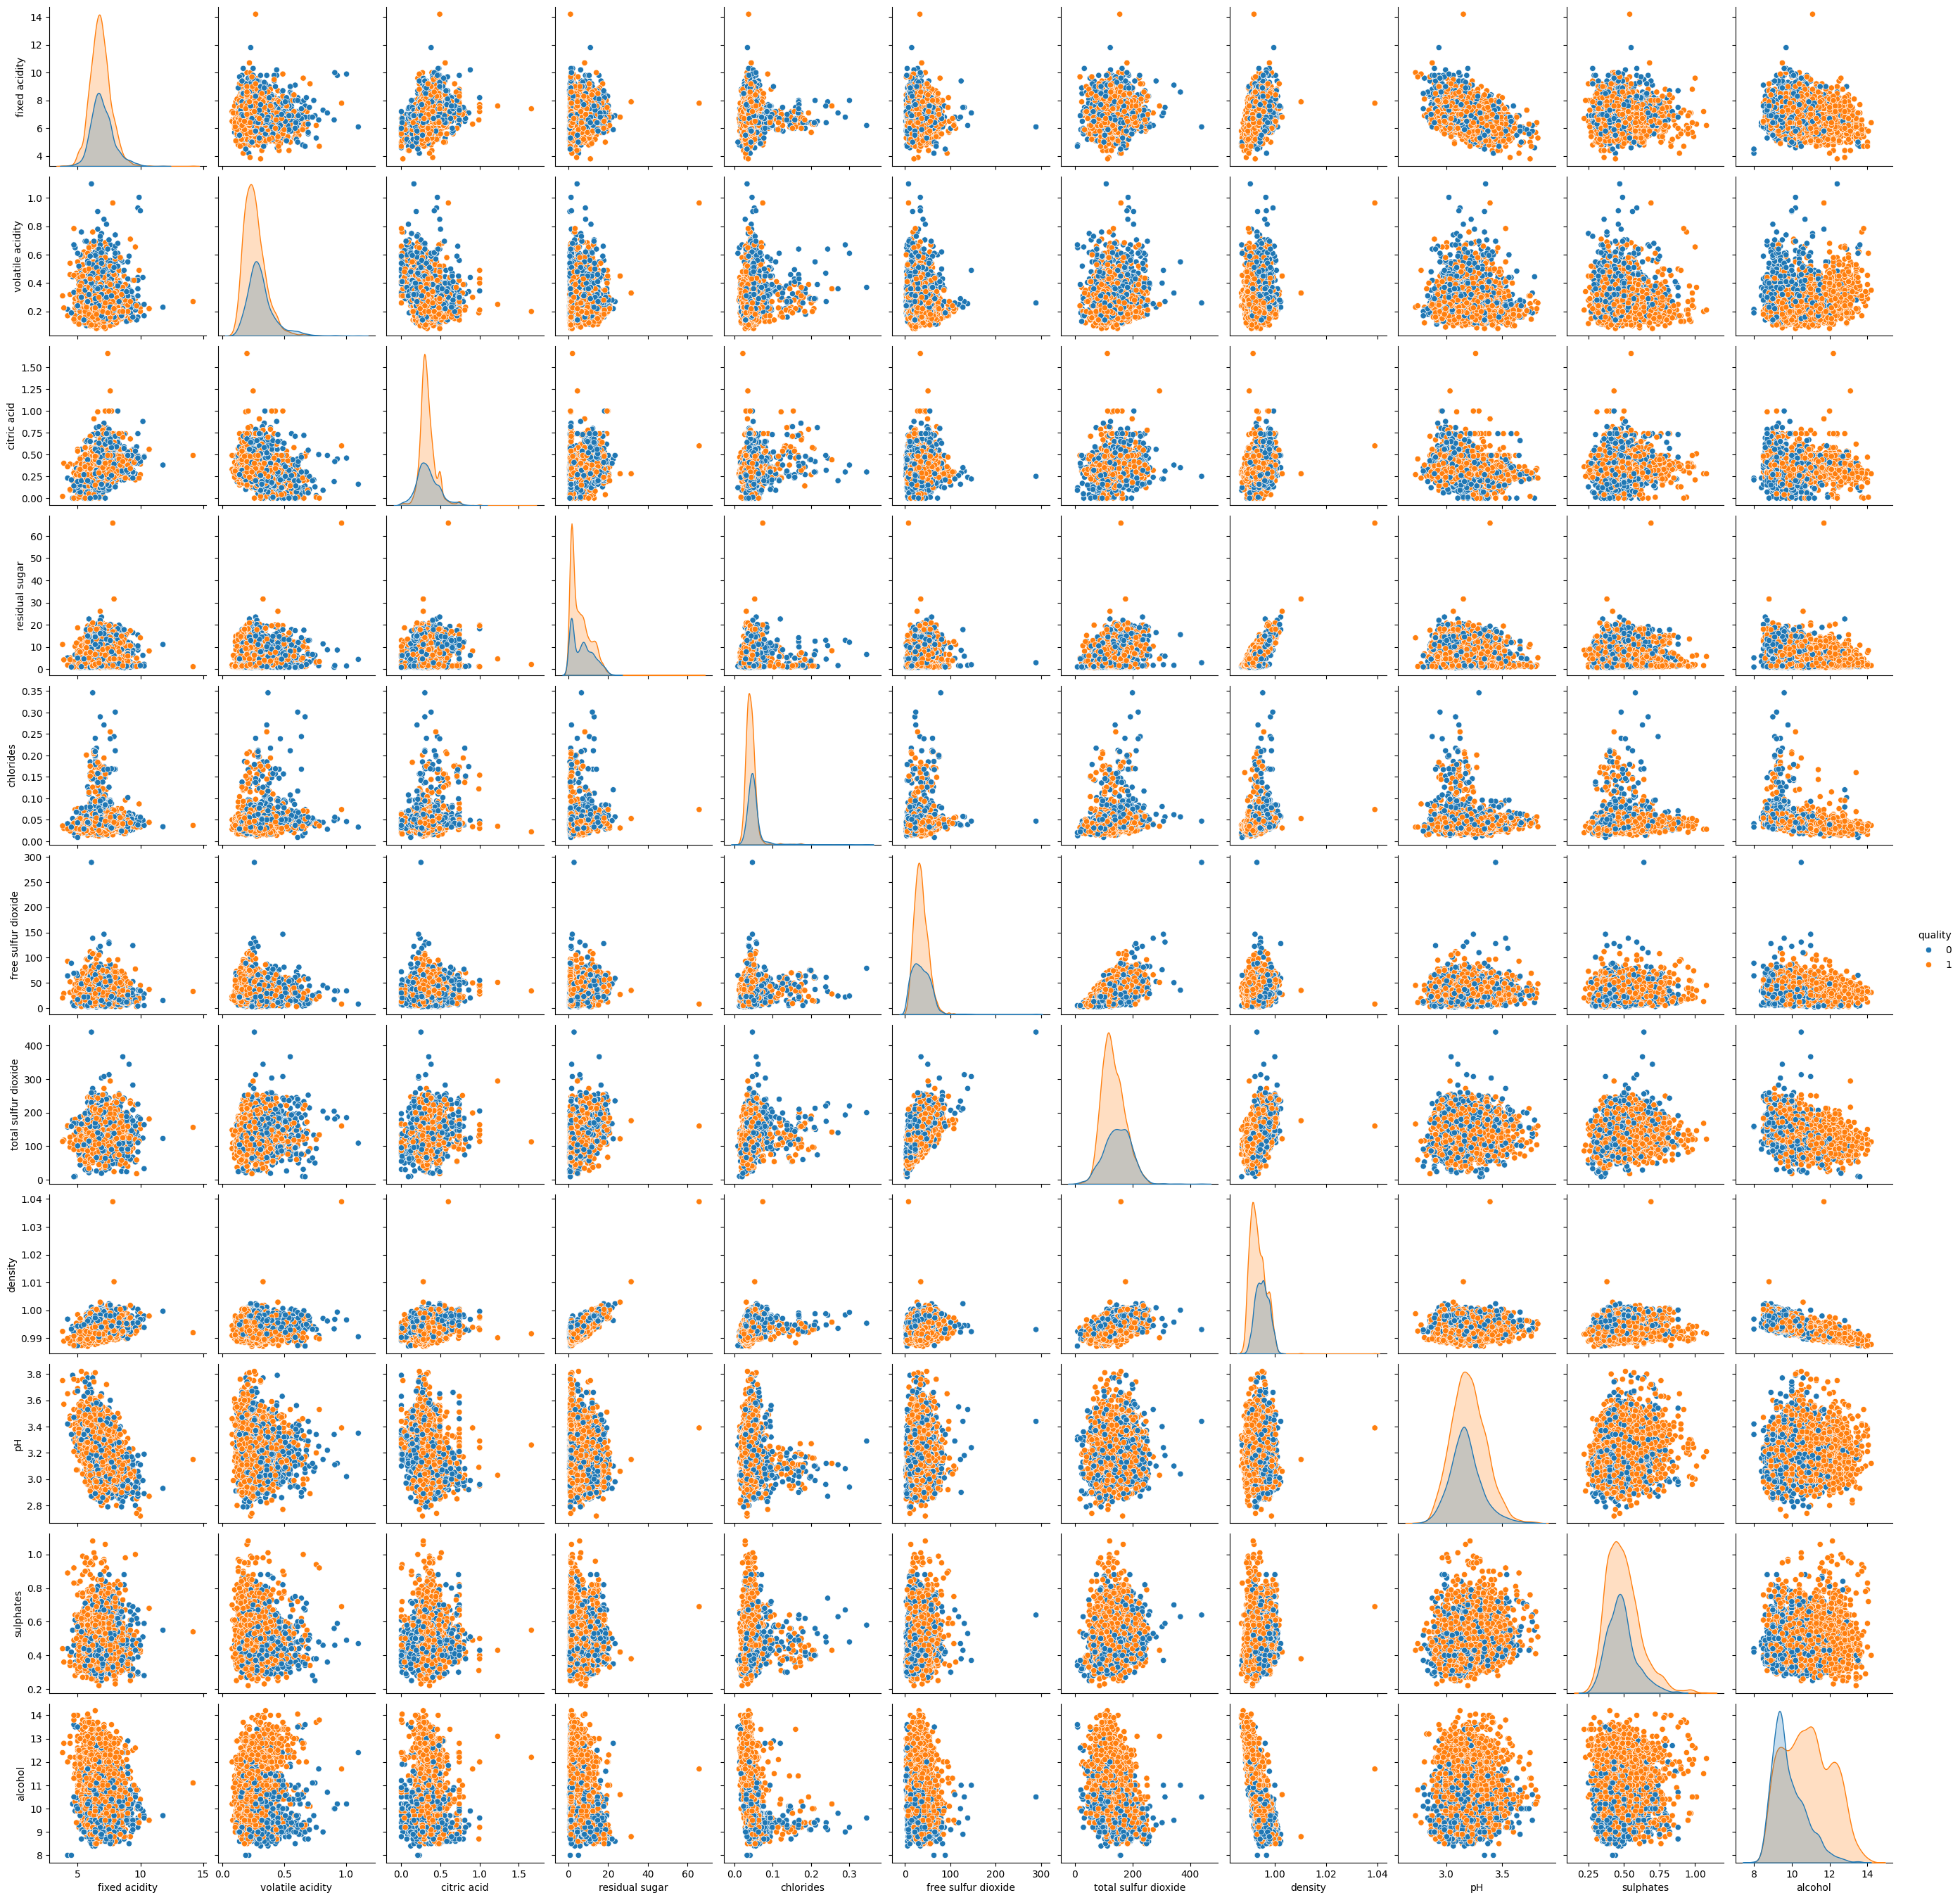

Dropped features: {'total sulfur dioxide', 'density', 'alcohol'}


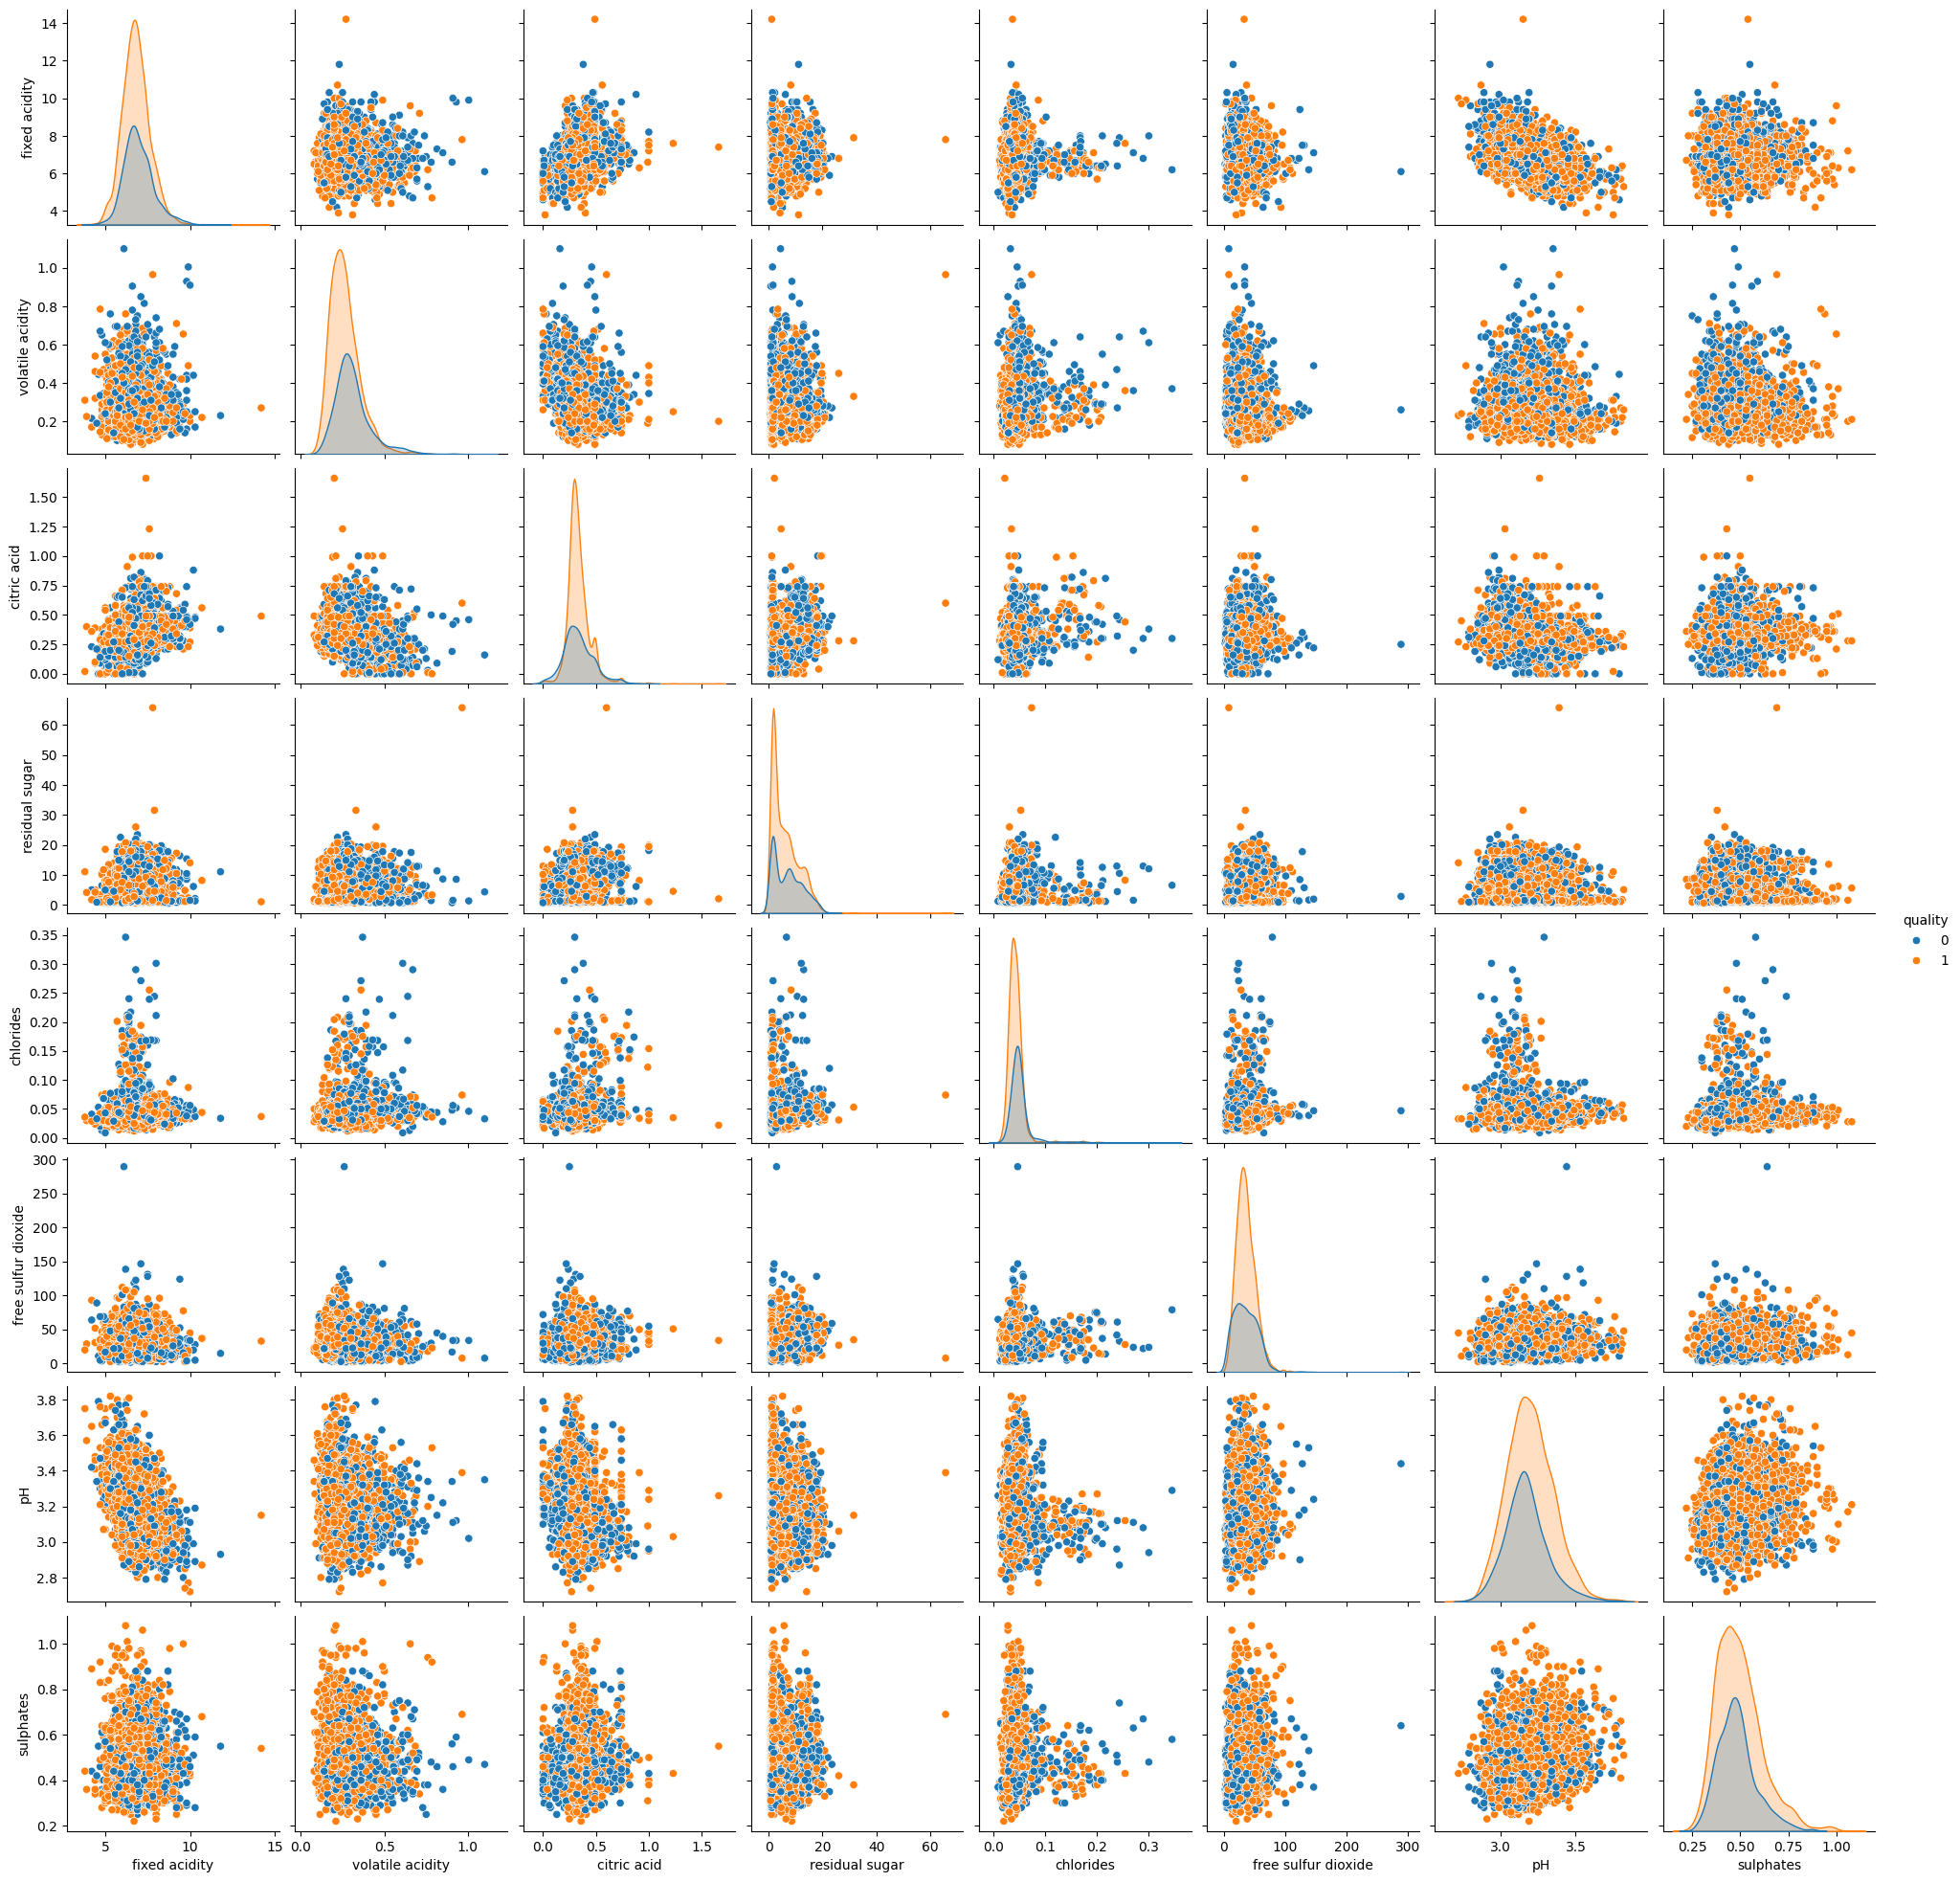

In [19]:
# Generate pair plots using seaborn
sns.pairplot(dfShuffled, hue='quality')
plt.show()

# Correlation matrix to show how each var is corelated to each other
correlation_matrix = dfShuffled.corr()

# Next, we have to itterate through the corelation matrix and find pairs that have a greater threshold than 0.6, meaning they are repeating
highCorrelation = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            highCorrelation.add(colname)

#Now that we identified which pairs are redundent, we can drop them and finnaly print out the dropped features as well as plot the new df
newDF = dfShuffled.drop(columns=highCorrelation)

# Display the dropped features
print("Dropped features:", highCorrelation)

sns.pairplot(newDF, hue='quality')
plt.show()

In [20]:
#The purpose of this function is to partition the data into training and testing sets

def partition(featureMatrix, targetVector, t=0.8, random_seed=None):
    #To be sure that t is within the valid range of 0 and 1, we need to first make sure that the length of the feature matrix and target vector are of the same length
    if len(featureMatrix) != len(targetVector):
        return "feature matrix and target vector must be of same length"
    # Check if t is within the valid range
    if t <= 0 or t >= 1:
        return "The ratio 't' is not of valid range (0, 1)"

    #Randomize indicies, this will ensure data is scattered and random
    np.random.seed(random_seed)
    shuffled_indices = np.random.permutation(len(featureMatrix))

    #split the data
    trainIndices = shuffled_indices[:int(len(featureMatrix) * t)]
    testIndices = shuffled_indices[int(len(featureMatrix) * t):]

    # Partition feature matrix and target vector based on indices
    trainFeature = featureMatrix[trainIndices]
    testFeature = featureMatrix[testIndices]
    trainTarget = targetVector[trainIndices]
    testTarget = targetVector[testIndices]

    return trainFeature, testFeature, trainTarget, testTarget


In [25]:
# Get the feature matrix and the target value from the shuffled datafram we created earlier
X = newDF.drop(columns=['quality']).values
y = newDF['quality'].values


# With the partitiion function we created above, we can split our data into training and testing sets. The ratio we will use is 0.8
XTrain, XTest, yTrain, yTest = partition(X, y, 0.8)

#Train the model with the training sets and record predictions made
model.fit(XTrain, yTrain, n_neighbors=5, weight='uniform')
unscaledPredictions = model.predict(XTest)

#Calculate the accuracy and error of the model predictions compared to the test dataset and the f1 score
unscaledAccuracy, unscaledError = accuracyGeneralization(yTest, unscaledPredictions)


#Get the average and standard deviation for futhur analysis
meanValues = np.mean(XTrain, axis=0)
stdValues = np.std(XTrain, axis=0)
XTrainStandardized = (XTrain - meanValues) / stdValues
XTestStandardized = (XTest - meanValues) / stdValues

# results
print("Unscaled Data Results:")
print(f"Accuracy: {unscaledAccuracy:.2%}")



Unscaled Data Results:
Accuracy: 67.65%


In [26]:
#Now that we trained our model, we can train the model on the standardized data that we created
# Re runs the KNN Classifier method on the new standarized data
model.fit(XTrainStandardized, yTrain, n_neighbors=5, weight='uniform')
predictionsStandardized = model.predict(XTestStandardized)

#accuracy and f1 score for furthur analysis of the model
accuracy_standardized, error_standardized = accuracyGeneralization(yTest, predictionsStandardized)


print("\nResults for Standardized Data:")
print(f"Accuracy: {accuracy_standardized:.2%}")



Results for Standardized Data:
Accuracy: 74.08%


In [ ]:
print("\nComparison:")
print(f"Accuracy (Unscaled): {unscaledAccuracy:.2%}")
print(f"Accuracy (Standardized): {accuracy_standardized:.2%}")

if accuracy_standardized > unscaledAccuracy:
    print("use standardized data")
else:
    print("use unscaled data")

In [29]:
# Run KNN_Classifier on unscaled data with inverse distance weighting
model.fit(XTrain, yTrain, n_neighbors=5, weight='inverse_distance')
predictions_weighted = model.predict(XTest)

# Calculate accuracy and F1 score for weighted data
accuracy_weighted, error_weighted = accuracyGeneralization(yTest, predictions_weighted)

print("\nResults for Inverse Distance Weighting:")
print(f"Accuracy: {accuracy_weighted:.2%}")


# Compare with previous results
print("\nComparison with Inverse Distance Weighting:")
print(f"Accuracy (Weighted): {accuracy_weighted:.2%}")

if accuracy_weighted > unscaledAccuracy:
    print("Using inverse distance weighting is recommended.")
else:
    print("Not using inverse distance weighting is recommended.")

IndexError: index 596 is out of bounds for axis 0 with size 10